In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../lib/')
from frustration_graph import *
import pickle
import os
import copy
import time
import os
from tqdm import tqdm

In [5]:
from dwave.system import DWaveSampler, EmbeddingComposite, FixedEmbeddingComposite
import minorminer
import dimod
import dwave.inspector

In [3]:
res_path = "../../Results/Ising_Frustrated/"

L = 20
config = np.zeros((L, L))

ratios = np.linspace(0, 1, 100)

In [6]:
qpu = DWaveSampler() #'defaults'

bqm = bqm_frustration(L, 1, 0)
emb = minorminer.find_embedding(dimod.to_networkx_graph(bqm), qpu.to_networkx_graph(), threads=12)
sampler = FixedEmbeddingComposite(qpu, embedding=emb) #EmbeddingComposite(qpu)

In [14]:
res = []
i = 1
for ratio in tqdm(ratios):
    bqm = bqm_frustration(L, ratio, 0)
    sampleset = sampler.sample(bqm, num_reads=50, annealing_time=900, chain_strength=4,
                                    label=f'Ising Frustrated {i}/{ratios.size}')
    
    M = []
    W = []
    W1 = []
    for sample in sampleset.lowest():
        for node, value in sample.items():
            split = node.split('-')
            x, y = int(split[0]), int(split[1])
            
            config[x, y] = value
        
        M.append(np.abs(config.mean())), W.append(wall(config)), W1.append(wall1(config))
    
    res.append([np.mean(M), np.std(M), np.mean(W), np.std(W), np.mean(W1), np.std(W1)])
    i += 1

100%|██████████| 100/100 [01:44<00:00,  1.04s/it]


In [15]:
res = np.array(res)

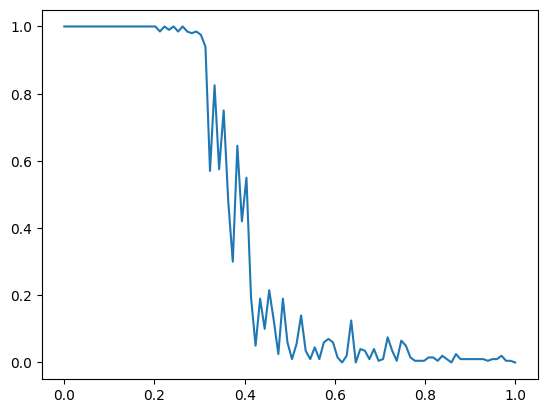

In [16]:
plt.plot(ratios, res[:, 0])

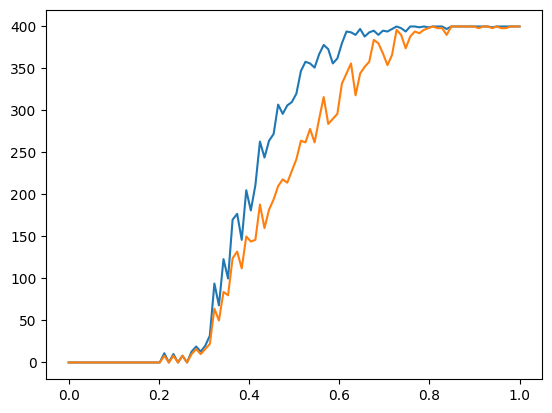

In [17]:
plt.plot(ratios, res[:, [2,4]])

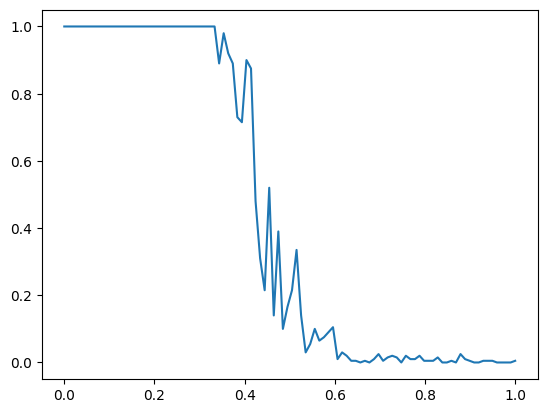

In [26]:
plt.plot(ratios, res[:, 0])

In [29]:
np.savetxt('Magnetizations_walls.dat', np.column_stack([ratios, res]))